In [17]:
from src import SMO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split

### Generating / Loading The Data

In [18]:
# X, y = make_blobs(500, centers=2, cluster_std=1.4)
X, y = make_circles(n_samples=1000, noise=0.12, factor=0.5)
y[y == 0] = -1
np.savetxt('data/circles.csv', np.column_stack((X, y)), delimiter=',')

# data = np.loadtxt('data/blobs.csv', delimiter=',')
# X, y = data[:, :2], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### A Function For Plotting Datapoints And Coloring

In [19]:
def plot_datapoints(features, labels):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(features[:, 0], features[:, 1], c=labels)
    plt.show()

### Making an Instance of The Model, Training The Model

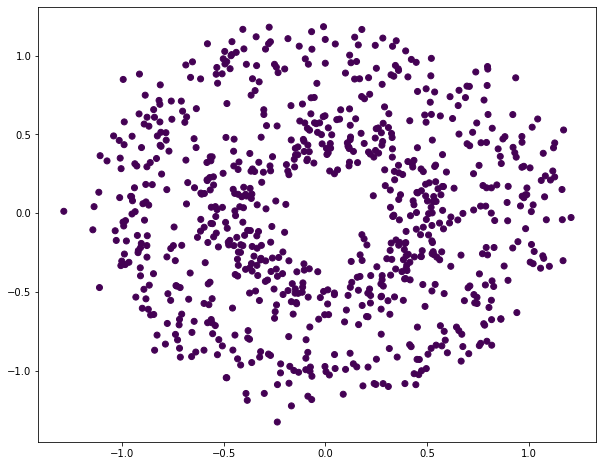

Initial Accuracy: 0.48625


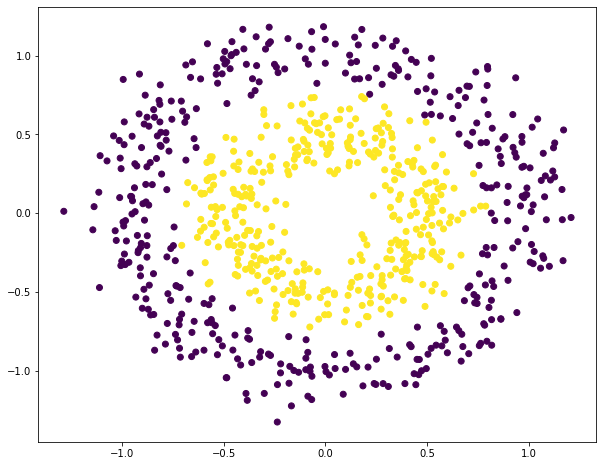

In [20]:
model = SMO(X_train, y_train, 'rbf', 0.05)
pred, acc = model.predict(X_train, y_train)

plot_datapoints(X_train, np.sign(pred))
print(f'Initial Accuracy: {acc}')

for i in range(50):
    pred, acc = model.fit()
    print(f'{i}) Accuracy: {acc}{" "*20}', end='\r')

plot_datapoints(X_train, np.sign(pred))

### Getting Support Vectors of The Model

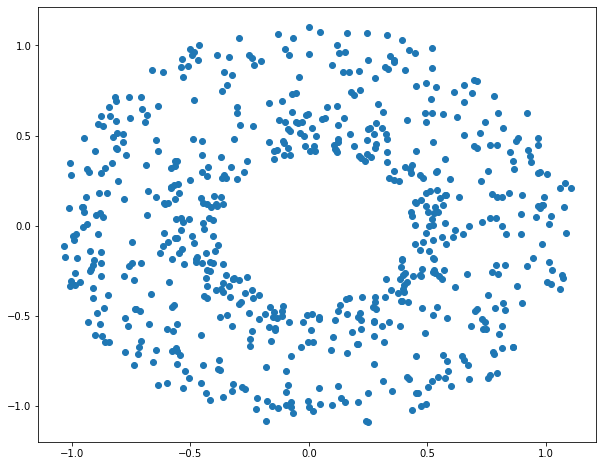

650

In [21]:
sv = model.get_support_vectors()
plot_datapoints(sv, None)
len(sv)

### Testing The Model With a Test Data

0.97


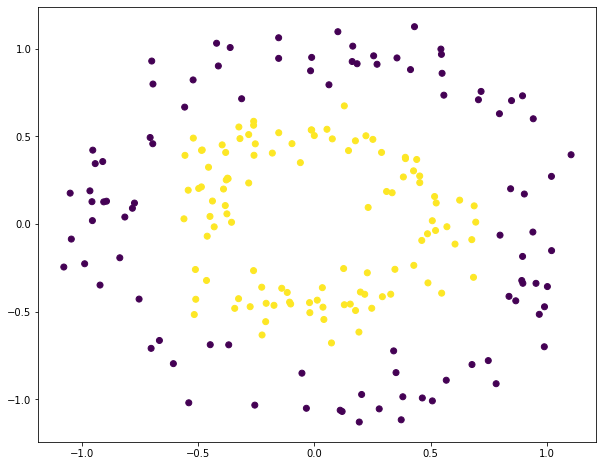

In [22]:
pred_test, acc_test = model.predict(X_test, y_test)
print(acc_test)
plot_datapoints(X_test, np.sign(pred_test))